<a href="https://colab.research.google.com/github/amiguelnobrega/TikTok/blob/main/tiktok2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages for data manipulation
import pandas as pd
import numpy as np

#import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mount google drive in colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import the dataset csv file
df = pd.read_csv('/content/gdrive/Othercomputers/My MacBook Air/Estudo/Google Advance DA/Projects/TikTok/tiktok_dataset.csv')
print('done!')

done!


In [4]:
#display and explore the first few rows of the dataframe
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
#get the size of the data, i.e. number of elements in the dataframe
df.size

232584

In [6]:
#get the shape of the data, i.e. number of rows and columns
df.shape

(19382, 12)

In [7]:
#basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
#descriptive statistics table
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


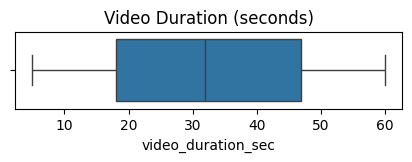

In [9]:
#boxplot to visualize distribution of video duration (seconds)
plt.figure(figsize=(5,1))
plt.title('Video Duration (seconds)')
sns.boxplot(x=df['video_duration_sec']);

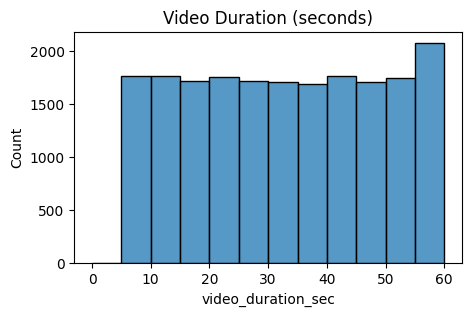

In [10]:
#histogram for further exploration of video duration distribution
plt.figure(figsize=(5,3))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5))
plt.title('Video Duration (seconds)');

The videos range between 5 to 60 seconds and the distribution is uniform

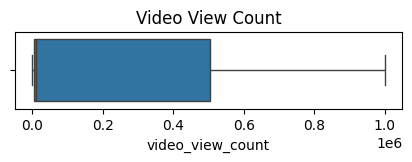

In [11]:
#create boxplot to visualize distribution of video_view_count
plt.figure(figsize=(5,1))
plt.title('Video View Count')
sns.boxplot(x=df['video_view_count']);

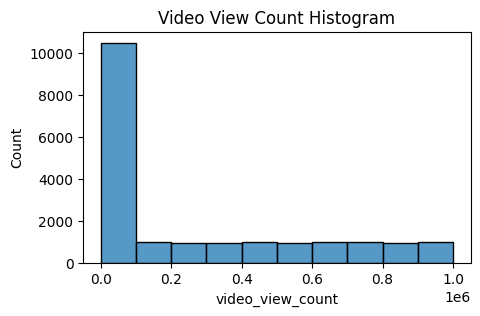

In [12]:
#further exploration of video view count with histogram
plt.figure(figsize=(5,3))
sns.histplot(df['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video View Count Histogram');

The video view count has an uneven distribution, with more than half the videos receiving less than 100,000 views. The distribution of view counts > 100,000 is uniform.

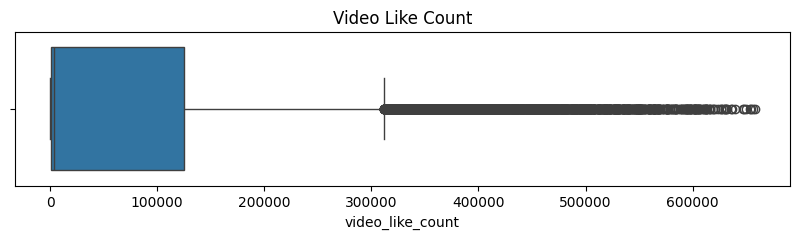

In [13]:
#create boxplot to analyse the video like count distribution
plt.figure(figsize=(10,2))
plt.title('Video Like Count')
sns.boxplot(x=df['video_like_count']);

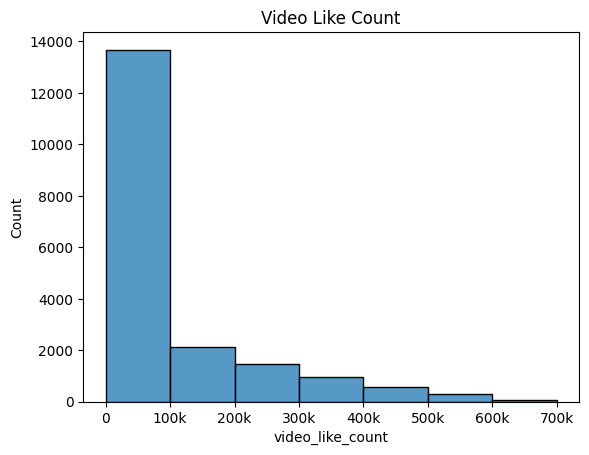

In [15]:
#further exploration of video like count with histogram
vlc_hist = sns.histplot(df['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
vlc_hist.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video Like Count');

In [16]:
#above for loop used for label range setting
for i in range(100, 701, 100):
  print(i)

100
200
300
400
500
600
700


Similar to view count, there are far more videos with less than 100,000 likes than there are videos with more. Nonetheless, in this case, there is more of a gradual narrowing, as the data skews right, with many videos at the upper extremity of like count.

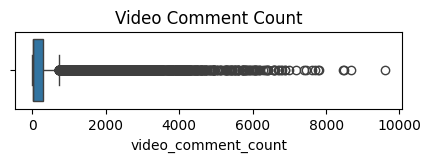

In [17]:
#create boxplot to visualize distribution of video comment count
plt.figure(figsize=(5,1))
plt.title('Video Comment Count')
sns.boxplot(x=df['video_comment_count']);

Text(0.5, 1.0, 'Video Comment Count')

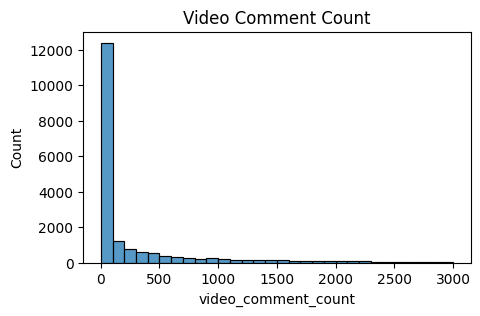

In [18]:
#histogram for video comment count
plt.figure(figsize=(5,3))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video Comment Count')

Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very skewed to the right.

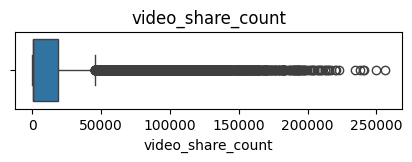

In [19]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=df['video_share_count']);

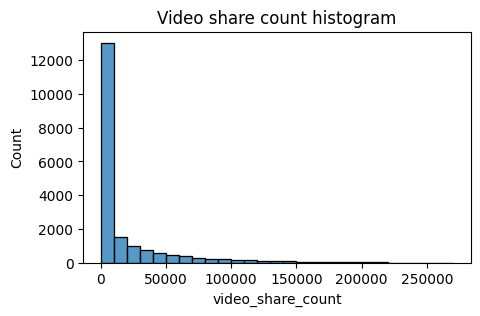

In [21]:
#histogram of video share count
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

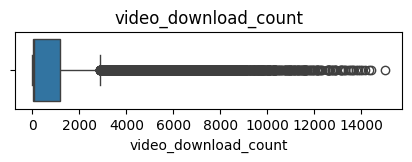

In [23]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=df['video_download_count']);

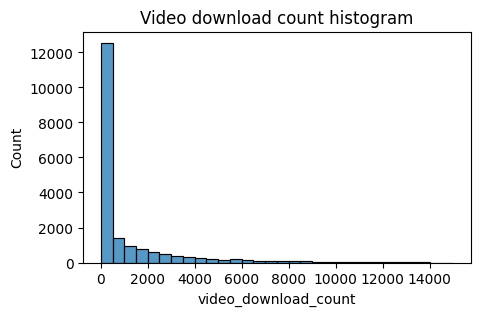

In [25]:
#Video download count histogram
plt.figure(figsize=(5,3))
sns.histplot(df['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

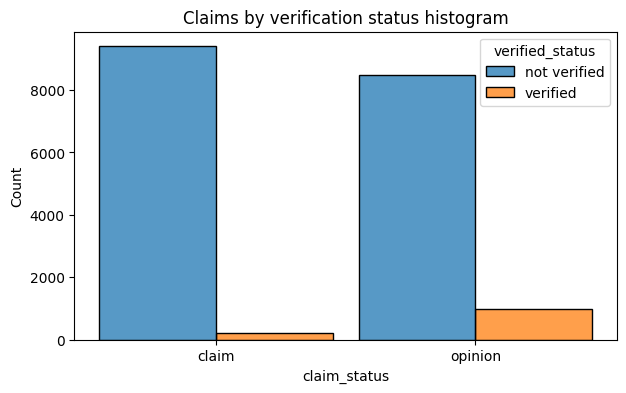

In [27]:
#claim status by verification status
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

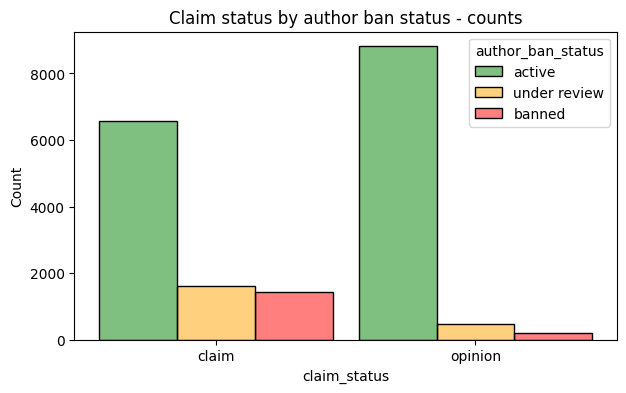

In [28]:
#claim status by author ban status
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

<ipython-input-30-4e07899cb5a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


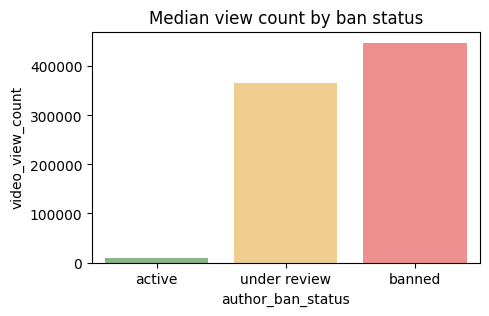

In [30]:
#median view counts by ban status
ban_status_counts = df.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

The median view counts for non-active authors are many times greater than the median view count for active authors. Since we now know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

Indeed, a quick check of the median view count by claim status bears out this assessment:

In [31]:
df.groupby('claim_status')['video_view_count'].median()

,video_view_count
claim_status,
claim,501555.0
opinion,4953.0


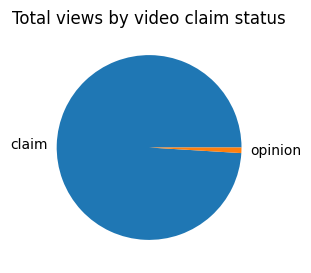

In [32]:
#total views by claim status (pie chart)
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

he overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

In [37]:
#using a for loop to determine outliers
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

# Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


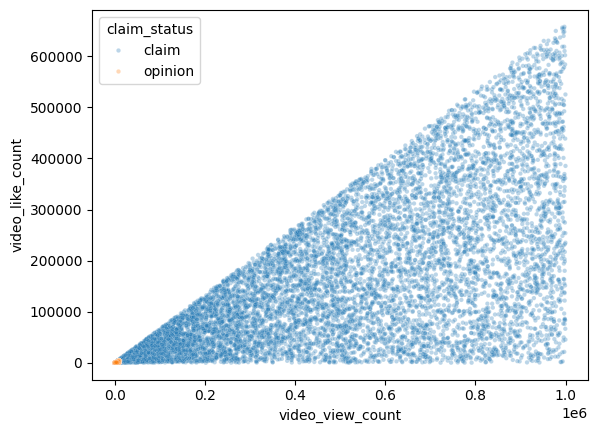

In [38]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=df["video_view_count"], y=df["video_like_count"],
                hue=df["claim_status"], s=10, alpha=.3)
plt.show()

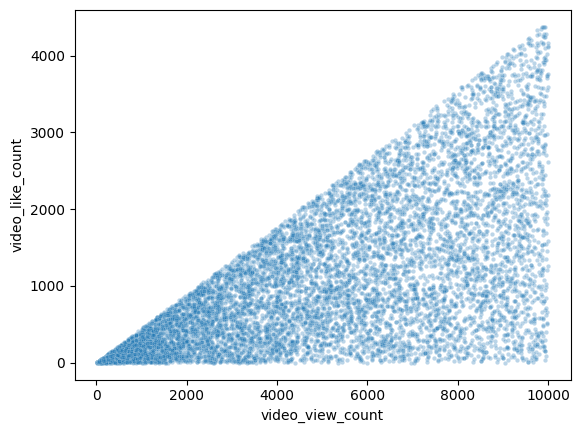

In [40]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

#Key Insights
The exploratory data analysis conducted revealed many considerations for the classification model, including missing values, “claims” to “opinions” balance, and overall distribution of data variables. The two key insights from this analysis were:

###1. Null Values
Over 200 null values were found in 7 different columns. As a result, future modeling should consider the null values to avoid making insights that would assume complete data. Further analysis is necessary to investigate the reason for these null values, and their impact on future statistical analysis or model building;

###2. Skewed Data Distribution
Video view and like counts are all concentrated on low end of 1,000 for opinions. Therefore, the data distribution is right-skewed, which will inform the models and model types that will be built.